In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [ ]:
! unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import os
import glob

In [ ]:
data =[]
labels = []
classes =43
cur_path = os.getcwd()
#print(cur_path)
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            path_2 = os.path.join(path,a)
            image = Image.open(path_2)
            image = image.resize((30,30))
            # Resizing all images into 30*30
            image =np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print('e')



In [ ]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [ ]:
X_train, X_test, y_train, y_test =train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

In [ ]:
model =Sequential()
# Feature Extraction Using Convolutional Neural Network
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
# Classification Using Neural Networks
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 133s 135ms/step - loss: 1.9474 - accuracy: 0.5126 - val_loss: 0.5453 - val_accuracy: 0.8667
Epoch 2/20
981/981 [==============================] - 130s 132ms/step - loss: 0.6152 - accuracy: 0.8170 - val_loss: 0.1543 - val_accuracy: 0.9565
Epoch 3/20
981/981 [==============================] - 129s 131ms/step - loss: 0.3954 - accuracy: 0.8854 - val_loss: 0.1870 - val_accuracy: 0.9459
Epoch 4/20
981/981 [==============================] - 134s 136ms/step - loss: 0.3167 - accuracy: 0.9087 - val_loss: 0.1046 - val_accuracy: 0.9722
Epoch 5/20
981/981 [==============================] - 130s 132ms/step - loss: 0.2833 - accuracy: 0.9212 - val_loss: 0.0827 - val_accuracy: 0.9783
Epoch 6/20
981/981 [==============================] - 130s 132ms/step - loss: 0.3144 - accuracy: 0.9168 - val_loss: 0.1192 - val_accuracy: 0.9702
Epoch 7/20
981/981 [==============================] - 130s 132ms/step - loss: 0.2368 - accuracy: 0.9351 - val_loss: 0.0750 -

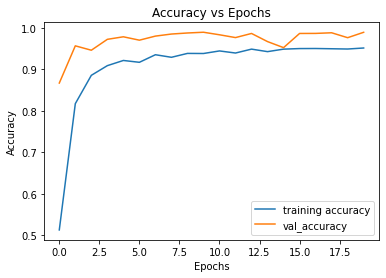

In [ ]:
#Plot of Accuracy vs Epochs
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

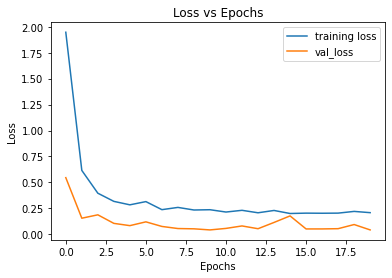

In [ ]:
#Plot of Loss vs Epochs
plt.figure(1)
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
def model_test(i):
    y_test = pd.read_csv(i)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data = []
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test = np.array(data)
    return X_test, label

X_test, labels = model_test('Test.csv')
print(labels)

[16  1 38 ...  6  7 10]


In [ ]:
predict_y = model.predict(X_test)
classes_y = np.argmax(predict_y, axis=1)
classes_y

array([16,  1, 38, ...,  3,  7, 10])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels,classes_y))

0.956215360253365


In [ ]:
model.save("./training/model_tsc.h5")

In [ ]:
os.chdir('/content')
model = load_model("./training/model_tsc.h5")

In [ ]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Vehicle > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing vehicle > 3.5 tons' }

In [ ]:
def testing_for_signs(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    predict_y = model.predict(X_test)
    classes_y = np.argmax(predict_y, axis=1)
    return image,classes_y

The traffic sign is:  Stop


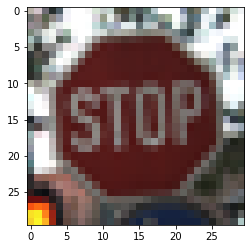

In [ ]:
image, predicted_value = testing_for_signs("./Test/07180.png")
a = int(predicted_value)
print("The traffic sign is: ", classes[a])
plt.imshow(image)
plt.show()



In [ ]:
'''from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
CM = confusion_matrix(labels,classes_y)
disp = ConfusionMatrixDisplay(confusion_matrix = CM)
disp.plot()
plt.show()'''
data = {'Actual': labels, 'Predicted': classes_y}
df = pd.DataFrame(data, columns = ['Actual','Predicted'])
CM = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(CM)


Predicted  0    1    2    3    4    5    6   ...   36  37   38  39  40  41  42
Actual                                       ...                              
0          58    0    0    0    2    0    0  ...    0   0    0   0   0   0   0
1           0  683    7    0   17    6    2  ...    0   0    1   0   3   0   0
2           0    2  743    0    0    3    0  ...    0   0    0   2   0   0   0
3           0    0    0  435    0   10    0  ...    0   0    0   0   0   0   0
4           0    0    0    1  645    4    0  ...    0   0    0   0   0   0   0
5           0    1   25    6    3  594    0  ...    0   0    0   0   0   0   0
6           0    0    0   21    0    0  121  ...    0   0    0   0   0   0   5
7           0    1    0    0    0    6    0  ...    0   0    0   0   1   0   0
8           0    0    0    1    2    0    0  ...    0   0    0   0   0   0   0
9           0    0    0    0    0    0    0  ...    0   0    0   0   0   0   0
10          0    0    0    1    0    0    0  ...    